# Analytics of Ambient

- 作業環境
    - https://miro.com/app/board/o9J_l9jSAOo=/
    - https://drive.google.com/drive/folders/1wnKK2SaN9DgPUa2PFSJbwizaDHOHitGc?usp=sharing
 

## やりたいこと

 - ある音のラウドネスとシャープネスなどの指標でマッピングする
 
## 課題

 - 音を分割するひつようがある. 
     - N 秒
 - 心理音響指標をpythonで出せるか
     - [MoSQITo/tuto_signal_basic_operations.ipynb at master · Eomys/MoSQITo · GitHub](https://github.com/Eomys/MoSQITo/blob/master/tutorials/tuto_signal_basic_operations.ipynb)

## 進め方

 - 1. 音を聴く.
 - 2. 心理音響指標算出
 
 
 ## 結果
  - 音源が長くて心理音響指標が計算できない
 
 ## 変更
  - 音源を5秒刻みに変更
  - 中間3秒だけで心理音響指標を算出
  - jsonで保存

# 参考

 - 周波数重心
     https://www.geidai.ac.jp/~marui/r_program/spectrum.html

In [92]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn

import librosa
import librosa.display


In [93]:
def _mkdir(p, exist_ok=True, parents=True):
    p.mkdir(exist_ok=True, parents=True)
    return p

Path.fmkdir = _mkdir

In [94]:
INTERIM_DIR = "data/wav-splits"
FIG_DIR = "data/wav-splits"
JSON_DIR = "data/wav-splits"

In [95]:
wave_paths = list(Path(INTERIM_DIR).glob("*.wav"))
wave_paths = [str(p) for p in wave_paths]
wave_paths.sort()
wave_paths

['data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.0.wav',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.1.wav',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.2.wav',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.3.wav',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.4.wav',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.5.wav',
 'data/wav-splits/10.古市小学校前.mono.0.wav',
 'data/wav-splits/10.古市小学校前.mono.1.wav',
 'data/wav-splits/10.古市小学校前.mono.2.wav',
 'data/wav-splits/10.古市小学校前.mono.3.wav',
 'data/wav-splits/10.古市小学校前.mono.4.wav',
 'data/wav-splits/10.古市小学校前.mono.5.wav',
 'data/wav-splits/11.東大通パーク.mono.0.wav',
 'data/wav-splits/11.東大通パーク.mono.1.wav',
 'data/wav-splits/11.東大通パーク.mono.2.wav',
 'data/wav-splits/11.東大通パーク.mono.3.wav',
 'data/wav-splits/11.東大通パーク.mono.4.wav',
 'data/wav-splits/11.東大通パーク.mono.5.wav',
 'data/wav-splits/12.東大通パーク2.mono.0.wav',
 'data/wav-splits/12.東大通パーク2.mono.1.wav',
 'data/wav-splits/12.東大通パーク2.mono.2.wav',
 'data/wav-splits/1

In [97]:
import random
wav_path =wave_paths[0]
wav_path = random.choice(wave_paths)
wav_path

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 35 µs


'data/wav-splits/4.大阪梅田.mono.1.wav'

# 出力形式

 - グラフ
     - Audio
     - Loudness
     - Sharpness
     - Roughness
 - json
     - filename
     - length
     - loudness.mean
     - sharpness.mean
     - roughness.mean

In [98]:
from mosqito.functions.shared.load import load
from mosqito.functions.loudness_zwicker.comp_loudness import comp_loudness
from mosqito.functions.loudness_zwicker.comp_loudness import comp_loudness
from mosqito.functions.sharpness.comp_sharpness import comp_sharpness
from mosqito.functions.roughness_danielweber.comp_roughness import comp_roughness

In [99]:
# import random
wave_paths = list(Path(INTERIM_DIR).glob("*.wav"))
wave_paths = [str(p) for p in wave_paths]
wave_paths.sort()

wav_path =wave_paths[0]
# wav_path = random.choice(wave_paths)
wav_path


CPU times: user 35 µs, sys: 1 µs, total: 36 µs
Wall time: 41.2 µs


'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.4.wav'

In [109]:
fig_path = Path(wav_path).with_suffix(".jpg")
json_path = Path(wav_path).with_suffix(".json")

print(wav_path)
print(fig_path)
print(json_path)

data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.4.wav
data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.4.jpg
data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.4.json


In [101]:
# SIgnal
signal, fs = load( None, wav_path)

N = len(signal)
y_signal = signal
t_signal = np.linspace(0, N*(1/fs), N)

Signal resampled to 48 kHz to allow calculation.


In [102]:
# Loudness
loudness = comp_loudness(False, signal, fs, field_type = 'free')
loudness_sone = loudness['values']
loudness_time = np.linspace(0,0.002*(loudness_sone.size - 1), loudness_sone.size)

In [103]:
# Sharpness
sharpness = comp_sharpness(False, signal, fs, method="din", skip=0.2)

sharp_acum = sharpness['values']
sharp_time = np.linspace(0,0.002*(sharp_acum.size - 1), sharp_acum.size)

In [104]:
# Roughness
roughness = comp_roughness(signal, fs, overlap=0)

y_rough = roughness['values']
t_rough = roughness['time']

Roughness is being calculated


In [113]:
data_json = {
    "wav_path" : wav_path,
    "loudness" : np.mean(loudness_sone), 
    "sharpness" : np.mean(sharp_acum), 
    "roughness" : np.mean(y_rough), 
}

import json
with open(json_path, mode='wt', encoding='utf-8') as fp:
    json.dump(data_json, fp, ensure_ascii=False, indent=2)

# ロード
with open(json_path, mode='rt', encoding='utf-8') as fp:
    data = json.load(fp)
    print(data)


{'wav_path': 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.4.wav', 'loudness': 3.1020915864047214, 'sharpness': 0.9718879335148133, 'roughness': 0.011783935083352917}


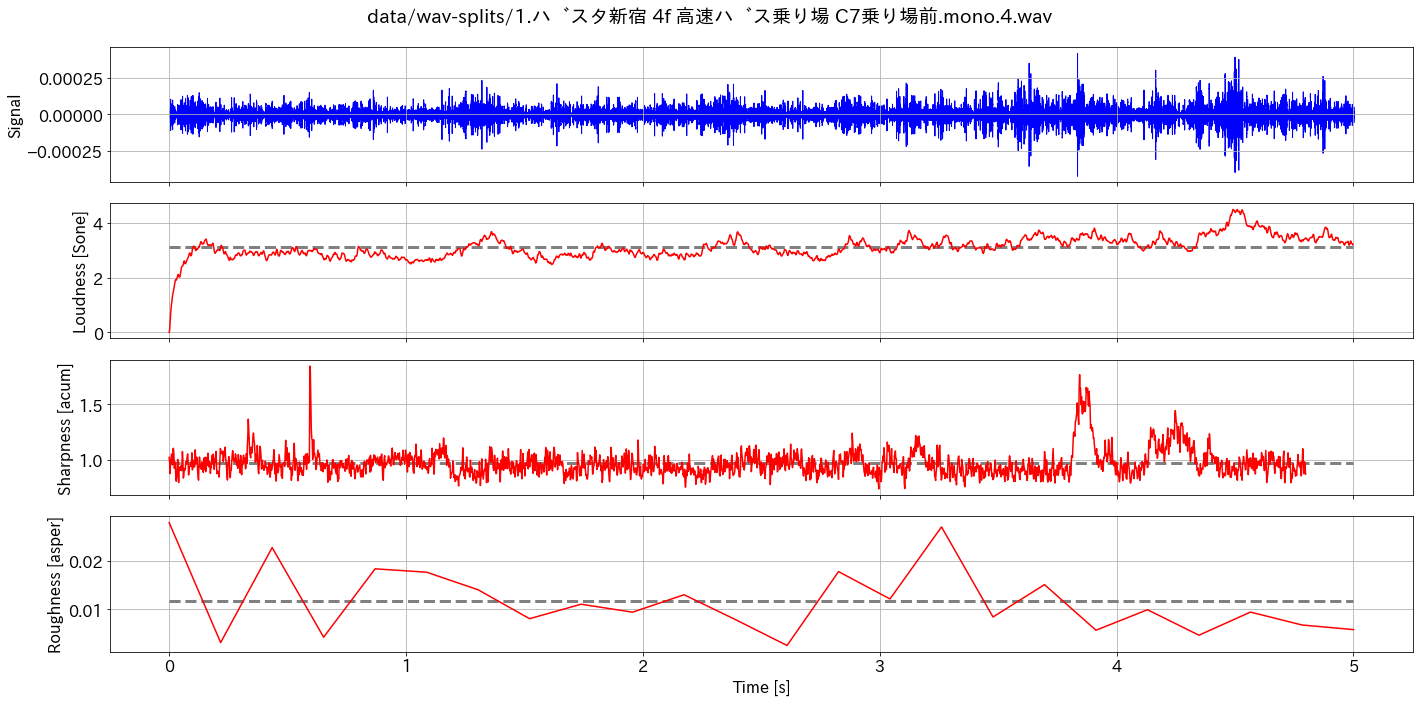

In [110]:
plt.rcParams["font.size"] = 16

fig, ax = plt.subplots(4, 1, figsize=(20, 10), sharex=True)

# signal
plt.sca(ax[0])

fill_sig = np.abs(y_signal) ** 2
plt.fill_between(t_signal, fill_sig, 0, color="b")
plt.fill_between(t_signal, -1*fill_sig, 0, color="b")

plt.ylabel("Signal")
plt.grid()

# Loudness
plt.sca(ax[1])
plt.plot(loudness_time, loudness_sone, color="r")
plt.hlines(y=np.mean(loudness_sone), xmin=0, xmax=5, colors='gray', linestyle='dashed', linewidth=3)
plt.ylabel("Loudness [Sone]")
plt.grid()

# Sharpness
plt.sca(ax[2])
plt.plot(sharp_time, sharp_acum, color="r")
plt.hlines(y=np.mean(sharp_acum), xmin=0, xmax=5, colors='gray', linestyle='dashed', linewidth=3)
plt.ylabel("Sharpness [acum]")
plt.grid()

# Roughness
plt.sca(ax[3])
plt.plot(t_rough, y_rough, color="r")
plt.hlines(y=np.mean(y_rough), xmin=0, xmax=5, colors='gray', linestyle='dashed', linewidth=3)
plt.ylabel("Roughness [asper]")
plt.grid()

plt.xlabel("Time [s]")

plt.suptitle(wav_path)

plt.tight_layout()
plt.savefig(fig_path)